In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

In [22]:
import scattertext as st

In [10]:

# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import re 
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
lemmer = WordNetLemmatizer()
stop_words_nltk = set(stopwords.words('english'))


In [36]:
sui_noise = ['http', 'na', 'paul', 'jake', 'gon', 'filler', 'pop', 'got', 'ha', 'ni', 'lt', 'gt', 'wa', 'ur', 'cum', 'would', 'sus', 'cheese', 'get', 'cecil', 'want', ]


In [33]:
stop_words_nltk

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection.csv')

In [17]:
df

,Unnamed: 0,processed,class,category
0,0,ex wife threatening suiciderecently left wife ...,suicide,1
1,1,weird get affected compliment coming someone k...,non-suicide,0
2,2,finally almost never hear ha bad year ever swe...,non-suicide,0
3,3,need helpjust help im cry hard,suicide,1
4,4,losthello name adam struggling year afraid pas...,suicide,1
...,...,...,...,...
232069,232069,like rock going get anything go http musictast...,non-suicide,0
232070,232070,tell many friend lonely everything deprived pr...,non-suicide,0
232071,232071,pee probably taste like salty tea someone dran...,non-suicide,0
232072,232072,usual stuff find herei posting sympathy pity k...,suicide,1


In [74]:
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [w for w in [lemmer.lemmatize(token) for token in tokens] if not w in stop_words_nltk]

remove_punct_dict = dict((ord(punct), ' ') for punct in string.punctuation)

def LemNormalize(text):
#     text = process(text)
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def process(text):
    text = re.sub('\W+', ' ', text)
    text = re.sub(r'[0-9]', ' ', text)
    x = LemNormalize(str(text))
    text = ' '.join(x)
    collect_text = []

    for items in text.split():
        if len(items) > 1:
            collect_text.append(items)
    return ' '.join(collect_text)

In [75]:
df['processed'] = df.text.apply(lambda x: process(x))

In [27]:
df.columns

Index(['Unnamed: 0', 'text', 'class', 'processed'], dtype='object')

In [76]:
df.to_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')

In [1]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')

NameError: name 'pd' is not defined

In [16]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [4]:
df

,Unnamed: 0,processed,class,category
0,0,ex wife threatening suiciderecently left wife ...,suicide,1
1,1,weird get affected compliment coming someone k...,non-suicide,0
2,2,finally almost never hear ha bad year ever swe...,non-suicide,0
3,3,need helpjust help im cry hard,suicide,1
4,4,losthello name adam struggling year afraid pas...,suicide,1
...,...,...,...,...
232069,232069,like rock going get anything go http musictast...,non-suicide,0
232070,232070,tell many friend lonely everything deprived pr...,non-suicide,0
232071,232071,pee probably taste like salty tea someone dran...,non-suicide,0
232072,232072,usual stuff find herei posting sympathy pity k...,suicide,1


In [6]:
df = df.astype(str)

In [21]:
scatter_data = df[df['processed'].map(len) > 300]

In [22]:
scatter_data

,Unnamed: 0,processed,class,category
0,0,ex wife threatening suiciderecently left wife ...,suicide,1
4,4,losthello name adam struggling year afraid pas...,suicide,1
5,5,honetly idki dont know im even feel like nothi...,suicide,1
6,6,trigger warning excuse self inflicted burn kno...,suicide,1
8,8,everyone want edgy making self conscious feel ...,non-suicide,0
...,...,...,...,...
232060,232060,going try please sw may last hope tried kill t...,suicide,1
232062,232062,paralyzing anxiety amp depression pushing edge...,suicide,1
232066,232066,mom tried kill today feel lost second time hap...,suicide,1
232067,232067,fucking scummy person change itever since wa k...,suicide,1


In [9]:
scatter_data.category.value_counts()

1    66382
0    16002
Name: category, dtype: int64

In [23]:
dep_data=scatter_data[scatter_data['category']=='0']

In [24]:
dep_data

,Unnamed: 0,processed,class,category
8,8,everyone want edgy making self conscious feel ...,non-suicide,0
23,23,posting galadriel opening monologue every day ...,non-suicide,0
24,24,sleep sock feel sleeping sock tried first time...,non-suicide,0
26,26,guy want friend alone talk anyone dm anything ...,non-suicide,0
66,66,crush quarantine never girlfriend last year wa...,non-suicide,0
...,...,...,...,...
232021,232021,offering help putting see anyone need advice s...,non-suicide,0
232028,232028,got friend zoned talking girl year already say...,non-suicide,0
232036,232036,go back high school online school graduate ple...,non-suicide,0
232047,232047,cat died cat strawberry passed wa honestly don...,non-suicide,0


In [25]:
scatter_data = df[(df['processed'].map(len) > 1000)]

In [28]:
sui_data = scatter_data[scatter_data['category']=='1']

In [29]:
sui_data

,Unnamed: 0,processed,class,category
4,4,losthello name adam struggling year afraid pas...,suicide,1
22,22,trapped inside voiddear whoever care enough re...,suicide,1
71,71,anyone planning suicide long term future depre...,suicide,1
73,73,screenwriting course script character commit s...,suicide,1
78,78,feel hopelesshello guess attempt lifeline some...,suicide,1
...,...,...,...,...
232015,232015,year go two left outside opinion would nice le...,suicide,1
232026,232026,mental social problem killing mebackground nat...,suicide,1
232040,232040,depressed suicidal need talk venthey know righ...,suicide,1
232053,232053,memoir lifeim holding anything back post work ...,suicide,1


In [30]:
data = pd.concat([dep_data, sui_data])
data = data.sample(frac=1)

In [34]:
data.category.value_counts()

1    18191
0    16002
Name: category, dtype: int64

In [37]:
data['processed'] = data.processed.apply(lambda x: ' '.join([w for w in str(x).split() if w not in sui_noise]))

In [38]:
data.to_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed_equal_class.csv')

In [ ]:
for row, col in scatter_data.iterrows():
    if (len(col['processed']) < 1000) && (col['category']==1):
        print()

In [5]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#CREATING A DATAFRAME FOR SCATTERTEXT
scatter_data = df[['processed', 'class']]
LE = LabelEncoder()
scatter_data['category'] = LE.fit_transform(df['class'])

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
scatter_data.to_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')

NameError: name 'scatter_data' is not defined

In [12]:
#CREATING A DATAFRAME FOR SCATTERTEXT
scatter_data = df[['processed', 'class']]
LE = LabelEncoder()
scatter_data['category'] = LE.fit_transform(df['class'])
scatter_data.tail()

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,processed,class,category
232069,like rock going get anything go http musictast...,non-suicide,0
232070,tell many friend lonely everything deprived pr...,non-suicide,0
232071,pee probably taste like salty tea someone dran...,non-suicide,0
232072,usual stuff find herei posting sympathy pity k...,suicide,1
232073,still beaten first bos hollow knight fought ti...,non-suicide,0


In [14]:
df=0

In [13]:
scatter_data = scatter_data.dropna()


In [73]:
data = {'Depression': [], 'Suicide': []}
ind = []
for i in range(100, 1500, 100):
    scatter_data_x = scatter_data[scatter_data['processed'].map(len) > i]
    x = scatter_data_x.category.value_counts()
    data['Depression'].append(x[0])
    data['Suicide'].append(x[1])
    ind.append(i)

In [82]:
count = pd.DataFrame(data, index=ind)

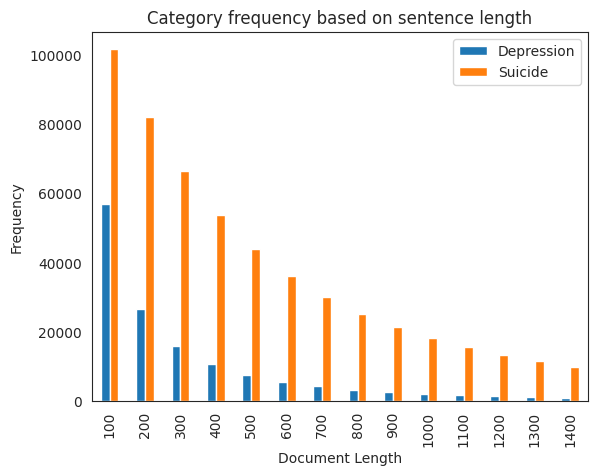

In [72]:
count = pd.DataFrame(data, index=ind)

count.plot(kind="bar", title="test") 
plt.xlabel("Document Length")
plt.ylabel("Frequency")
plt.title("Category frequency based on sentence length")
plt.show()

In [15]:
scatter_data = scatter_data[scatter_data['processed'].map(len) > 1000]

In [10]:
scatter_data.category.value_counts()

1    18191
0     2236
Name: category, dtype: int64

In [16]:
#CHECKING OUT COMMON WORDS IN r/SuicideWatch USING CVEC
cvec = CountVectorizer(stop_words='english')
cvec.fit(scatter_data['processed'])

CountVectorizer(stop_words='english')

In [83]:
f_names = len(cvec.get_feature_names())
f_names

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


68238

In [38]:
# CREATING A DATAFRAME OF EXTRACTED WORDS for non-suicide
created_df = pd.DataFrame(cvec.transform(
    scatter_data.processed[scatter_data['category'] == 1]).todense(), 
    columns=cvec.get_feature_names())
total_words = created_df.sum(axis=0)    

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
top_40_words = total_words.sort_values(ascending = False).head(100)
top_40_words_df = pd.DataFrame(top_40_words, columns = ["count"])

In [41]:

for items in sui_noise:
    if items in top_40_words_df.index:
        top_40_words_df = top_40_words_df.drop(items)

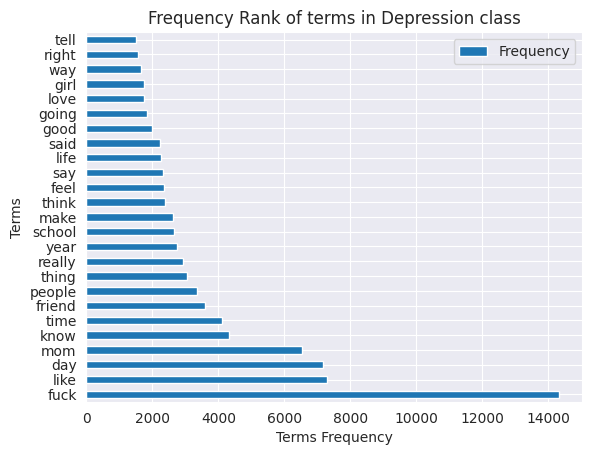

In [36]:
top_40_words_df[:25].plot(kind="barh")
plt.legend(['Frequency'])
plt.xlabel("Terms Frequency")
plt.ylabel("Terms")
plt.title("Frequency Rank of terms in Depression class")
plt.show()

In [46]:
nosui = ['like', 'life', 'feel', 'know', 'time', 'year', 'people', 'friend',
       'thing', 'really', 'day', 'think', 'going', 'make', 'thought', 'help',
       'school', 'way', 'family', 'work', 'good', 'love', 'better', 'job',
       'say', 'anymore', 'fucking', 'told', 'month', 'live', 'end', 'feeling',
       'parent', 'suicide', 'person', 'care', 'need', 'talk', 'right', 'point',
       'tried', 'die', 'started', 'hate', 'tell', 'long', 'bad', 'kill', 'try',
       'shit', 'wanted', 'said', 'lot', 'away', 'week', 'getting', 'mom',
       'felt', 'depression', 'im', 'happy', 'reason', 'home', 'went', 'trying',
       'come', 'pain', 'hard', 'world', 'maybe', 'problem', 'best', 'left',
       'ago', 'living', 'worse', 'hurt', 'girl', 'relationship', 'dad',
       'suicidal', 'let', 'actually', 'head', 'sure', 'night', 'mother', 'old',
       'little', 'money', 'look', 'able', 'past', 'stop', 'college', 'dont']
sui = ['fuck', 'like', 'day', 'mom', 'know', 'time', 'friend', 'people',
       'thing', 'really', 'year', 'school', 'make', 'think', 'feel', 'say',
       'life', 'said', 'good', 'going', 'love', 'girl', 'way', 'right', 'tell',
       'come', 'talk', 'let', 'guy', 'told', 'started', 'person', 'penis',
       'need', 'shit', 'thought', 'lot', 'help', 'went', 'parent', 'im', 'bad',
       'amp', 'work', 'little', 'cake', 'long', 'talking', 'fucking', 'class',
       'look', 'man', 'dad', 'today', 'start', 'care', 'point', 'text',
       'month', 'happened', 'week', 'game', 'bacon', 'better', 'best',
       'feeling', 'try', 'com', 'post', 'wanted', 'end', 'oh', 'new', 'mean',
       'getting', 'kid', 'pretty', 'hour', 'night', 'stuff', 'kind']

In [48]:
# Find most common words in top 40 words in each category
for i in range(len(nosui)):
    for j in range(len(sui)):
        if nosui[i] == sui[j]:
            print(sui[j])

like
life
feel
know
time
year
people
friend
thing
really
day
think
going
make
thought
help
school
way
work
good
love
better
say
fucking
told
month
end
feeling
parent
person
care
need
talk
right
point
started
tell
long
bad
try
shit
wanted
said
lot
week
getting
mom
im
went
come
best
girl
dad
let
night
little
look


In [46]:
    #CREATING A DATAFRAME OF EXTRACTED WORDS for together
    created_df = pd.DataFrame(cvec.transform(scatter_data_x['processed']).todense(),
                              columns=cvec.get_feature_names())
    total_words = created_df.sum(axis=0)
    


In [26]:
top_40_words

filler    22904
fuck      14312
wa        11353
like       7294
day        7167
mom        6547
gt         6177
lt         5925
sus        5793
cheese     5756
ur         5168
know       4327
time       4108
ni         4001
pop        3651
cum        3625
friend     3596
people     3351
cecil      3326
thing      3060
want       2967
really     2934
year       2754
school     2658
make       2628
na         2519
think      2395
got        2362
feel       2345
say        2323
life       2247
ha         2231
said       2223
good       1978
paul       1964
jake       1958
gon        1943
going      1831
love       1751
girl       1739
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'filler'),
  Text(0, 1, 'fuck'),
  Text(0, 2, 'wa'),
  Text(0, 3, 'like'),
  Text(0, 4, 'day'),
  Text(0, 5, 'mom'),
  Text(0, 6, 'gt'),
  Text(0, 7, 'lt'),
  Text(0, 8, 'sus'),
  Text(0, 9, 'cheese'),
  Text(0, 10, 'ur'),
  Text(0, 11, 'know'),
  Text(0, 12, 'time'),
  Text(0, 13, 'ni'),
  Text(0, 14, 'pop'),
  Text(0, 15, 'cum'),
  Text(0, 16, 'friend'),
  Text(0, 17, 'people'),
  Text(0, 18, 'cecil'),
  Text(0, 19, 'thing'),
  Text(0, 20, 'want'),
  Text(0, 21, 'really'),
  Text(0, 22, 'year'),
  Text(0, 23, 'school'),
  Text(0, 24, 'make'),
  Text(0, 25, 'na'),
  Text(0, 26, 'think'),
  Text(0, 27, 'got'),
  Text(0, 28, 'feel'),
  Text(0, 29, 'say'),
  Text(0, 30, 'life'),
  Text(0, 31, 'ha'),
  Text(0, 32, 'said'),
  Text(0, 33, 'good'),
  Text(0, 34, 'paul'),
  Text(0, 35, 'jake'),
  

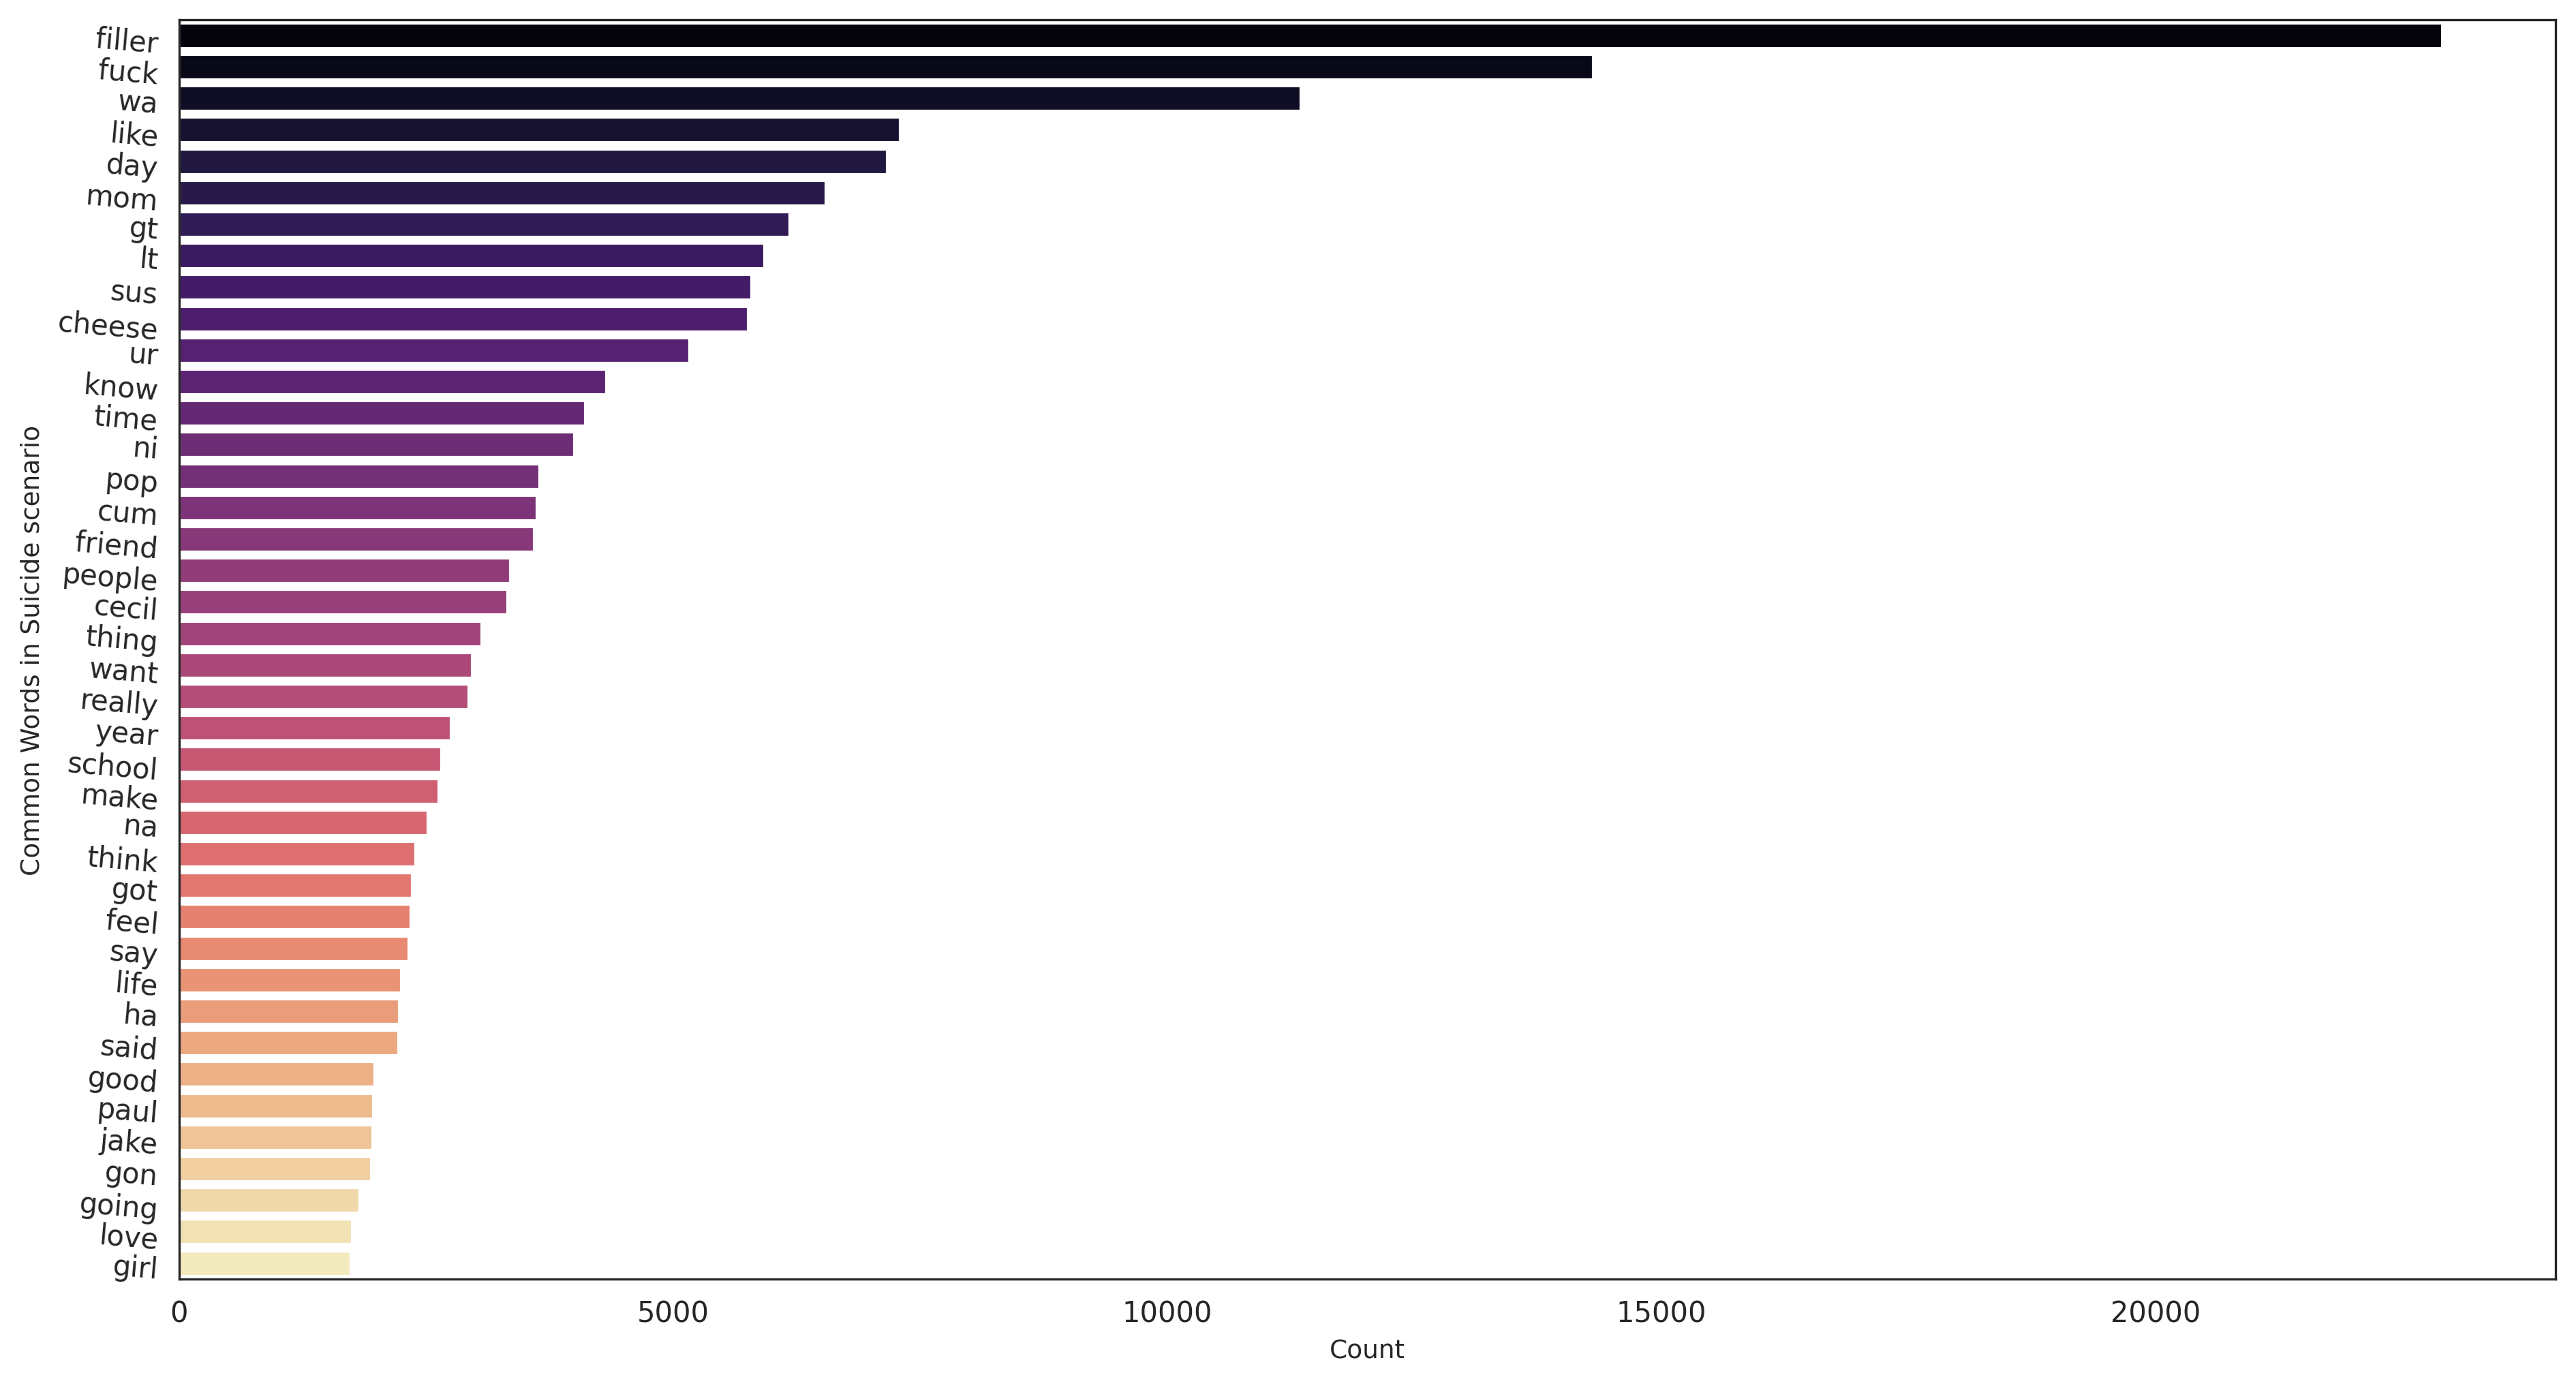

In [24]:
#<<<WORDCLOUD>>>
#CREATING A LONG STRING OF WORDS FOR THE WORD CLOUD MODULE
top_40_words = total_words.sort_values(ascending = False).head(40)
top_40_words_df = pd.DataFrame(top_40_words, columns = ["count"])
#PLOTTING THE COUNT OF THE TOP 20 WORDS
sns.set_style("white")
plt.figure(figsize = (15, 8), dpi=300)
ax = sns.barplot(y= top_40_words_df.index, x="count", 
                 data=top_40_words_df, palette = "magma")

plt.xlabel("Count", fontsize=9)
plt.ylabel('Common Words in {}'.format("Suicide scenario"), fontsize=9)
plt.yticks(rotation=5)

## ScatterText Starts from Here

In [38]:
scatter_data['processed'] = scatter_data.processed.apply(lambda x: ' '.join([w for w in str(x).split() if w not in sui_noise]))

In [42]:
scatter_data = scatter_data[scatter_data['processed'].map(len) > 1000]

In [43]:
scatter_data

,Unnamed: 0,processed,class,category
4,4,losthello name adam struggling year afraid pas...,suicide,1
22,22,trapped inside voiddear whoever care enough re...,suicide,1
23,23,posting galadriel opening monologue every day ...,non-suicide,0
71,71,anyone planning suicide long term future depre...,suicide,1
73,73,screenwriting course script character commit s...,suicide,1
...,...,...,...,...
232026,232026,mental social problem killing mebackground nat...,suicide,1
232028,232028,friend zoned talking girl year already saying ...,non-suicide,0
232040,232040,depressed suicidal need talk venthey know righ...,suicide,1
232053,232053,memoir lifeim holding anything back post work ...,suicide,1


In [44]:
#PARSING TEXT FOR SCATTERTEXT
nlp = st.whitespace_nlp_with_sentences
scatter_data['parsed'] = scatter_data.processed.apply(nlp)
scatter_data.tail()

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,processed,class,category,parsed
232026,232026,mental social problem killing mebackground nat...,suicide,1,"(mental, social, problem, killing, mebackgroun..."
232028,232028,friend zoned talking girl year already saying ...,non-suicide,0,"(friend, zoned, talking, girl, year, already, ..."
232040,232040,depressed suicidal need talk venthey know righ...,suicide,1,"(depressed, suicidal, need, talk, venthey, kno..."
232053,232053,memoir lifeim holding anything back post work ...,suicide,1,"(memoir, lifeim, holding, anything, back, post..."
232062,232062,paralyzing anxiety amp depression pushing edge...,suicide,1,"(paralyzing, anxiety, amp, depression, pushing..."


In [46]:
scatter_data.to_pickle('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_scatter.csv')

In [3]:
import pandas as pd
from ast import literal_eval

In [47]:
scatter_data = pd.read_pickle(
    '/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_scatter.csv'
)

In [48]:
corpus = st.CorpusFromParsedDocuments(scatter_data, category_col="class", 
                                      parsed_col="parsed").build().get_unigram_corpus().compact(
    st.AssociationCompactor(500))

In [49]:
from scattertext import CorpusFromPandas, produce_scattertext_explorer

In [50]:
#CREATING A SCATTERTEXT PLOT
html = produce_scattertext_explorer(corpus,
                                    category='suicide',
                                    category_name='Suicide',
                                    not_category_name='Depression',
                                    width_in_pixels=1000,
                                    jitter=0.1,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=scatter_data['class']
                                   )
file_name = '/home/ifte-home/Documents/mental_health/suicide/Reddit_ScattertextRankDataJitter.html'
open(file_name, 'wb').write(html.encode('utf-8'))


36511678

In [40]:
from pprint import pprint

In [87]:
# Here are the terms that are most associated with Suicide:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Suicide Score'] = corpus.get_scaled_f_scores('suicide')
pprint(list(term_freq_df.sort_values(by='Suicide Score', ascending=False).index[:20]))

['life',
 'feel',
 'want',
 'year',
 'even',
 'going',
 'would',
 'much',
 'know',
 'thing',
 'time',
 'get',
 'think',
 'people',
 'really',
 'never',
 'thought',
 'friend',
 'wa',
 'go']


In [88]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Non-Suicide Score'] = corpus.get_scaled_f_scores('non-suicide')
pprint(list(term_freq_df.sort_values(by='Non-Suicide Score', ascending=False).index[:20]))

['filler',
 'sus',
 'cheese',
 'ur',
 'ni',
 'lt',
 'cum',
 'pop',
 'cecil',
 'gt',
 'fuck',
 'paul',
 'jake',
 'mom',
 'http',
 'na',
 'gon',
 'penis',
 'cake',
 'bacon']
